# Label layers of empirical S-R Model

#### Taku Ito
#### 08/13/2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas.plotting import table 
sns.set_style("whitegrid")

#### Set parameters

In [2]:
projectdir = '/home/ti61/f_mc1689_1/SRActFlow/'

#### Load in CAB-NP ROI labels
cabn_labels = pd.read_csv(projectdir + 'data/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt',header=0,delimiter='\t')
df_labels = cabn_labels.iloc[0:360]
df_labels.reset_index()
del df_labels['INDEX'], df_labels["KEYVALUE"]

# Using final partition
networkdef = df_labels['NETWORKKEY'].values
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[networkorder]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360

sortednets = np.sort(list(xticks.keys()))
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

#### Data directories

In [3]:
hiddenfile = projectdir + 'data/results/MAIN/RSA/RSA_Similarity_SortedRegions2.txt'
rulefile = projectdir + 'data/results/MAIN/RuleDecoding/12Rule_Regions.csv'
orifile = projectdir + 'data/results/MAIN/InputStimuliDecoding/InputStimuliRegions_ORI.csv'
colorfile = projectdir + 'data/results/MAIN/InputStimuliDecoding/InputStimuliRegions_COLOR.csv'
pitchfile = projectdir + 'data/results/MAIN/InputStimuliDecoding/InputStimuliRegions_PITCH.csv'
constantfile = projectdir + 'data/results/MAIN/InputStimuliDecoding/InputStimuliRegions_CONSTANT.csv'


hiddenregions = np.loadtxt(hiddenfile)[:10]
ruleregions = np.loadtxt(rulefile)
oriregions = np.loadtxt(orifile)
colorregions = np.loadtxt(colorfile)
pitchregions = np.loadtxt(pitchfile)
constantregions = np.loadtxt(constantfile)

#### Conjunction hub network count

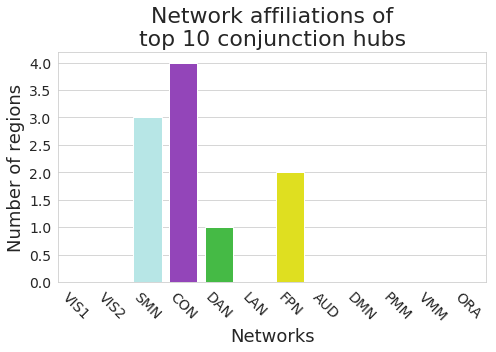

In [11]:
hidden_network = []
for region in hiddenregions:
    hidden_network.append(networkdef[int(region)]-1)
hidden_network = np.asarray(hidden_network)    
    
#### Count
networkcount = np.zeros((len(OrderedNetworks),))
for net in hidden_network:
    networkcount[int(net)] += 1
    
df_conjunction = {}
df_conjunction['Networks'] = []
df_conjunction['Number of regions'] = []
i = 0
for net in OrderedNetworks:
    df_conjunction['Networks'].append(net)
    df_conjunction['Number of regions'].append(networkcount[i])
    i+=1
df_conjunction = pd.DataFrame(df_conjunction)

plt.figure(figsize=(7,5));
plt.title("Network affiliations of\ntop 10 conjunction hubs",fontsize=22);
sns.barplot(x='Networks',y='Number of regions',data=df_conjunction,palette=networkpalette);
plt.xlabel("Networks",fontsize=18);
plt.ylabel("Number of regions",fontsize=18);
plt.xticks(fontsize=14,rotation=-45);
plt.yticks(fontsize=14);
plt.tight_layout()
# plt.savefig('ConjunctionHubNetworkAffiliation.png',dpi=300)


write = False
if write:
    with pd.ExcelWriter("../../data/NatComms_SourceData.xlsx",mode='a', engine="openpyxl") as writer:
        df_conjunction.to_excel(writer,sheet_name='SFig3c')

#### Task rule network count

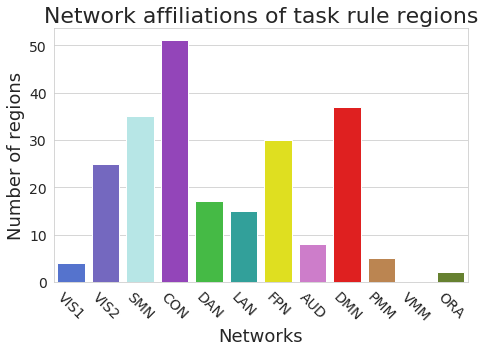

In [13]:
rule_network = []
for region in ruleregions:
    rule_network.append(networkdef[int(region)]-1)
rule_network = np.asarray(rule_network)    
    
#### Count
networkcount = np.zeros((len(OrderedNetworks),))
for net in rule_network:
    networkcount[int(net)] += 1
    
df_rules = {}
df_rules['Networks'] = []
df_rules['Number of regions'] = []
i = 0
for net in OrderedNetworks:
    df_rules['Networks'].append(net)
    df_rules['Number of regions'].append(networkcount[i])
    i+=1
df_rules = pd.DataFrame(df_rules)

plt.figure(figsize=(7,5));
plt.title("Network affiliations of task rule regions",fontsize=22);
sns.barplot(x='Networks',y='Number of regions',data=df_rules,palette=networkpalette);
plt.xlabel("Networks",fontsize=18);
plt.ylabel("Number of regions",fontsize=18);
plt.xticks(fontsize=14,rotation=-45);
plt.yticks(fontsize=14);
plt.tight_layout()
# plt.savefig('TaskRuleNetworkAffiliation.png',dpi=300)

write = False
if write:
    with pd.ExcelWriter("../../data/NatComms_SourceData.xlsx",mode='a', engine="openpyxl") as writer:
        df_conjunction.to_excel(writer,sheet_name='SFig3d')

# Tables

In [11]:
ori_layer_table = {}
ori_layer_table['Label'] = []
ori_layer_table['GlasserID'] = []
ori_layer_table['Network Affiliation'] = []
ori_layer_table['Hemisphere'] = []

for region in oriregions:
    ori_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    ori_layer_table['Label'].append(df_labels["LABEL"][region])
    ori_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    ori_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
ori_layer_table = pd.DataFrame(ori_layer_table)
ori_layer_table.to_csv('ori_layer_table.csv')
    
col_layer_table = {}
col_layer_table['Label'] = []
col_layer_table['GlasserID'] = []
col_layer_table['Network Affiliation'] = []
col_layer_table['Hemisphere'] = []
for region in colorregions:
    col_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    col_layer_table['Label'].append(df_labels["LABEL"][region])
    col_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    col_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
col_layer_table = pd.DataFrame(col_layer_table)
col_layer_table.to_csv('col_layer_table.csv')

pit_layer_table = {}
pit_layer_table['Label'] = []
pit_layer_table['GlasserID'] = []
pit_layer_table['Network Affiliation'] = []
pit_layer_table['Hemisphere'] = []
for region in pitchregions:
    pit_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    pit_layer_table['Label'].append(df_labels["LABEL"][region])
    pit_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    pit_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
pit_layer_table = pd.DataFrame(pit_layer_table)
pit_layer_table.to_csv('pit_layer_table.csv')

con_layer_table = {}
con_layer_table['Label'] = []
con_layer_table['GlasserID'] = []
con_layer_table['Network Affiliation'] = []
con_layer_table['Hemisphere'] = []
for region in constantregions:
    con_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    con_layer_table['Label'].append(df_labels["LABEL"][region])
    con_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    con_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
con_layer_table = pd.DataFrame(con_layer_table)
con_layer_table.to_csv('con_layer_table.csv')

# Create table for task rule layer

In [12]:
rule_layer_table = {}
rule_layer_table['Label'] = []
rule_layer_table['GlasserID'] = []
rule_layer_table['Network Affiliation'] = []
rule_layer_table['Hemisphere'] = []

for region in ruleregions:
    rule_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    rule_layer_table['Label'].append(df_labels["LABEL"][region])
    rule_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    rule_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
rule_layer_table = pd.DataFrame(rule_layer_table)
rule_layer_table.to_csv('rule_layer_table.csv')

# Create table for hidden layer

In [13]:
hidden_layer_table = {}
hidden_layer_table['Label'] = []
hidden_layer_table['GlasserID'] = []
hidden_layer_table['Network Affiliation'] = []
hidden_layer_table['Hemisphere'] = []

for region in hiddenregions:
    hidden_layer_table['GlasserID'].append(df_labels["GLASSERLABELNAME"][region])
    hidden_layer_table['Label'].append(df_labels["LABEL"][region])
    hidden_layer_table['Network Affiliation'].append(df_labels["NETWORK"][region])
    hidden_layer_table['Hemisphere'].append(df_labels["HEMISPHERE"][region])
hidden_layer_table = pd.DataFrame(hidden_layer_table)
hidden_layer_table.to_csv('hidden_layer_table.csv')